# Simulación en Esfera

In [1]:
library("plot3D")

Las siguientes lineas de código generan la esfera.

In [2]:
grid_size = 60;

In [3]:
eps = 0.01;
theta = seq(0+eps,pi-eps,l=grid_size);
phi = seq(0,2*pi-eps,l=grid_size);
coord = expand.grid(phi,theta);
x = sin(coord[,2])*cos(coord[,1]);
y = sin(coord[,2])*sin(coord[,1]);
z = cos(coord[,2]);
nsites = length(x);
val = 0.99999999999;
escala = 1;
mat = array(dim=c(nsites,nsites));

Genero la función de covarianza

In [4]:
cova <- function(escala,geod){
  res = exp(-3*geod/escala);
  return(res)    
}

Relleno la matriz de covarianza (siempre y cuando sea estacionaria débil)

In [5]:
for(i in 1:nsites){
  for(j in 1:nsites){
    prod = x[i]*x[j]+y[i]*y[j]+z[i]*z[j];
    if(prod > val){dij = 0;}
    if(prod < -val){dij = pi;}
    if(prod <= val & prod >= -val){dij = acos(prod);}
    mat[i,j] = cova(escala,dij);          
  }
}

Realizo la simulación

In [6]:
set.seed(0)
datos = t(chol(mat))%*%rnorm(nsites);

In [7]:
jpeg("sim1.pdf")
scatter3D(x,y,z,colvar=datos)
dev.off()

png 
  2

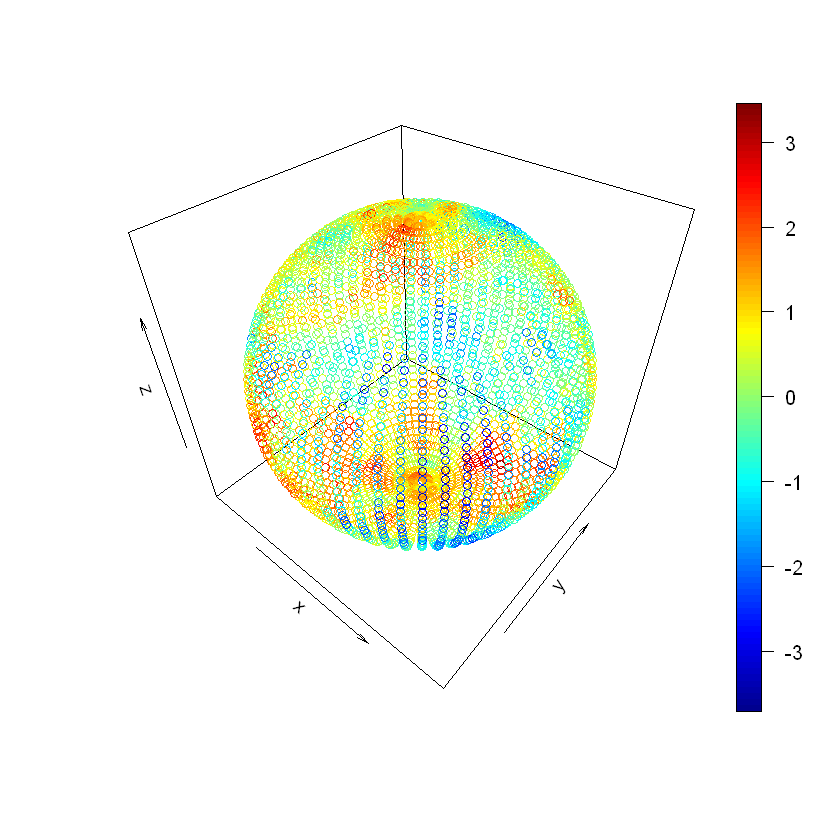

In [8]:
scatter3D(x,y,z,colvar=datos)